In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

def plotOnPlane(rhs, pts, time):
    ####
    plt.close()
#     plt.plot((0,0),(-10,10),'k--')
#     plt.plot((-10,10),(0,0),'k--')
    ptx, pty = zip(*pts)
#     plt.xlim([min(ptx), max(ptx)])
#     plt.ylim([min(pty), max(pty)])
    plt.axes().set_aspect('equal', adjustable='box')
    #

    for n, pt in enumerate(pts): ## for n, pt, maxT in enumerate(zip())
        trajectory = odeint(rhs,pt,time)
        xs, ys = zip(*trajectory)
        plt.plot(xs,ys, label = "Trajectory #{}".format(n+1))
        plt.scatter([trajectory[0][0]],[trajectory[0][1]],color='green')
        plt.scatter([trajectory[-1][0]],[trajectory[-1][1]],color='red')
        #K = min(12, len(trajectory)/2)
        #plt.quiver([trajectory[K][0]],[trajectory[K][1]], [rhs(trajectory[K],0.0)[0]], [rhs(trajectory[K],0.0)[1]], scale=50)
    lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09))
    plt.savefig('last.jpg')
        

def plotTimeSeries(rhs, pt, time):
    ####
    plt.close()
    plt.plot((min(time),max(time)),(0,0),'k--')
    plt.axes().set_aspect('equal', adjustable='box')
    plt.axes().set_xlabel(r'$T$, time')
    #
    trajectory = odeint(rhs,pt,time)
    xs, ys = zip(*trajectory)
    plt.plot(time,xs, label=r'$x(t)$')
    plt.plot(time,ys, label=r'$y(t)$')
    #
    plt.xlim([min(time), max(time)])
    plt.ylim([min(min(xs), min(ys)), max(max(xs), max(ys))])
    lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
    
matplotlib.rcParams['figure.figsize'] = 10, 20

In [0]:
def simple_focus(X, _):
    x, y = X
    return [-0.3*x+y, -0.3*y-x]

pts = [(1.0, 0.0), (2.0, 2.0), (-1.0, 2.0), (-3.0, -2.0), (4.0, -1.0)]
time = np.linspace(0, 10, 100)

plotOnPlane(simple_focus, pts, time)

In [0]:
plotTimeSeries(simple_focus, (-1.0, 2.0), time)

In [0]:
aval = +1.0

def simple_limit_cycle(X, _):
    x,y = X
    return [y - x*(x**2+y**2-aval), -x -y*(x**2+y**2-aval)]

pts = [(1.0, 0.0), (2.0, 2.0), (-1.0, 2.0), (-3.0, -2.0), (4.0, -1.0),(0.3,0)]
time = np.linspace(0, 40, 4000)

plotOnPlane(simple_limit_cycle, pts, time)

In [0]:
plotTimeSeries(simple_limit_cycle, (2.0,2.0), time)

In [0]:
mu = 3.0

def van_der_pol_oscillator_deriv(x, t):
    nx0 = x[1]
    nx1 = -mu * (x[0] ** 2.0 - 1.0) * x[1] - x[0]
    res = np.array([nx0, nx1])
    return res

pts = [(0.2, 0.2), (-3,-3),(4,4)]
time = np.linspace(0, 30, 2000)
plotOnPlane(van_der_pol_oscillator_deriv, pts, time)

In [0]:
plotTimeSeries(van_der_pol_oscillator_deriv, (-3,-3), time)

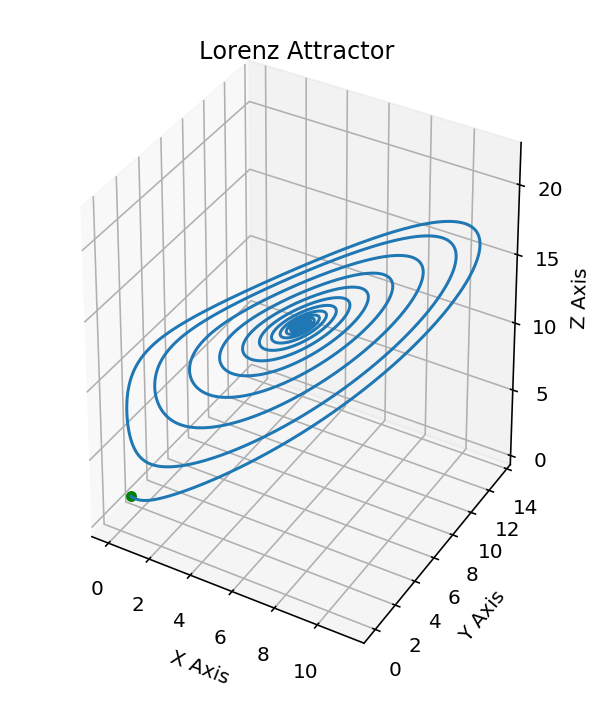

In [11]:
from mpl_toolkits.mplot3d import Axes3D


def lorenz(X, t, s=10, r=14, b=2.667):
    x, y, z = X
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

# Setting initial values
X0 = (0., 1., 1.05)
# tmax = 1
# tmax = 2
# tmax = 4
# tmax = 6
# tmax = 8
# tmax = 9.9
# tmax = 14.0
# tmax = 15.0
tmax = 2000.0
time = np.linspace(0, tmax, 1000000)



traj = odeint(lorenz,X0, time)
xs, ys, zs = zip(*traj)

matplotlib.rcParams['figure.figsize'] = 5, 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
ax.set_aspect('equal')
ax.scatter([traj[0][0]],[traj[0][1]],[traj[0][2]],color='green')
ax.scatter([traj[-1][0]],[traj[-1][1]],[traj[-1][2]],color='red')

plt.show()